In [42]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import matplotlib.dates as mdates


In [2]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_mixed")

extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

In [3]:
numitems_people = len(user_filenames)
print('Num sims people: ', numitems_people)

numitems_food = len(food_filenames)
print('Num sims food: ', numitems_food)

Num sims people:  19
Num sims food:  13


In [4]:
# Concat all in one df  
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

In [5]:
# Concat all in one df  
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [6]:
print('Num of total days and trips per sim - Food')

for sim in df_total_food:
    print(sim['Day'].max()-sim['Day'].min() +1 , len(sim))

Num of total days and trips per sim - Food
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079


In [7]:
print('Num of total days and trips per sim - Users')

for sim in df_total_user:
    print(sim['Day'].max()-sim['Day'].min() +1 , len(sim))

Num of total days and trips per sim - Users
7 14267
7 14323
7 14245
7 14278
7 14245
7 14279
7 14212
7 14272
7 14216
7 14145
7 14246
7 14179
7 14227
7 14236
7 14215
7 14293
7 14223
7 14265
7 14246


In [8]:
#Served trips and wait times - FOOD
i =0 

column_names= ['Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
wait_food = pd.DataFrame(columns=column_names)

served_food = pd.DataFrame(columns=['Served_pct'])


for sim_food in df_total_food:
  
  #Compute aveage wait 
  temp_p_served= sim_food.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_food.loc[sim_food['Trip Served']==True].shape[0]
  count_unserved=sim_food.loc[sim_food['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  wait_food = wait_food.append(pd.Series([average_wait_p, min_wait, max_wait, stdev_wait, q10, q50, q90], index=column_names), ignore_index=True)
  served_food = served_food.append(pd.Series(pct_served_p, index=['Served_pct']),ignore_index=True) 

  i+=1


print('Wait times')
print(wait_food)

print('Served trips')
print(served_food)

Wait times
    Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50        Q90
0   5.159431       0.1  39.966667   4.446676  1.233333  3.966667  10.133333
1   5.116553       0.1  40.300000   4.360503  1.233333  3.966667  10.066667
2   5.166894       0.1  40.633333   4.463886  1.233333  3.966667  10.100000
3   5.138530       0.1  40.433333   4.447993  1.200000  3.966667  10.000000
4   5.135666       0.1  39.900000   4.395731  1.200000  3.966667  10.100000
5   5.147332       0.1  40.400000   4.431312  1.200000  3.966667  10.100000
6   5.151822       0.1  40.900000   4.403937  1.233333  3.966667  10.200000
7   5.177122       0.1  40.266667   4.428571  1.233333  3.966667  10.200000
8   5.135898       0.1  39.833333   4.357752  1.233333  3.966667  10.033333
9   5.114203       0.1  39.533333   4.339641  1.233333  3.966667  10.000000
10  5.161474       0.1  40.866667   4.374433  1.200000  4.000000  10.133333
11  5.165822       0.1  40.300000   4.412805  1.233333  4.000000  10.100000
1

In [9]:
#Served trips and wait times - USERS
i =0 

column_names= ['Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
wait_user = pd.DataFrame(columns=column_names)

served_user = pd.DataFrame(columns=['Served_pct'])

for sim_user in df_total_user:
  
  #Compute aveage wait 
  temp_p_served= sim_user.loc[sim_user['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_user.loc[sim_user['Trip Served']==True].shape[0]
  count_unserved=sim_user.loc[sim_user['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  wait_user = wait_user.append(pd.Series([average_wait_p, min_wait, max_wait, stdev_wait, q10,q50,q90], index=column_names), ignore_index=True)
  served_user = served_user.append(pd.Series(pct_served_p, index=['Served_pct']),ignore_index=True) 

  i+=1


print('Wait times')
print(wait_user)

print('Served trips')
print(served_user)

Wait times
    Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90
0   4.060849       0.1  19.566667   2.866549  0.966667  3.366667  8.033333
1   4.078047       0.1  17.966667   2.869988  0.933333  3.433333  8.066667
2   4.040854       0.1  17.600000   2.871162  0.933333  3.366667  8.066667
3   4.056805       0.1  17.100000   2.858171  0.966667  3.366667  8.033333
4   4.097587       0.1  17.600000   2.907605  0.966667  3.400000  8.133333
5   4.094367       0.1  16.666667   2.900160  0.933333  3.400000  8.133333
6   4.060822       0.1  19.966667   2.864814  0.966667  3.400000  8.033333
7   4.074358       0.1  19.466667   2.874307  0.966667  3.400000  8.033333
8   4.064695       0.1  16.000000   2.855877  0.933333  3.400000  8.033333
9   4.058044       0.1  18.966667   2.875478  0.966667  3.366667  8.033333
10  4.070780       0.1  16.666667   2.854893  0.966667  3.400000  7.966667
11  4.060051       0.1  19.966667   2.859701  0.966667  3.400000  8.033333
12  4.056941  

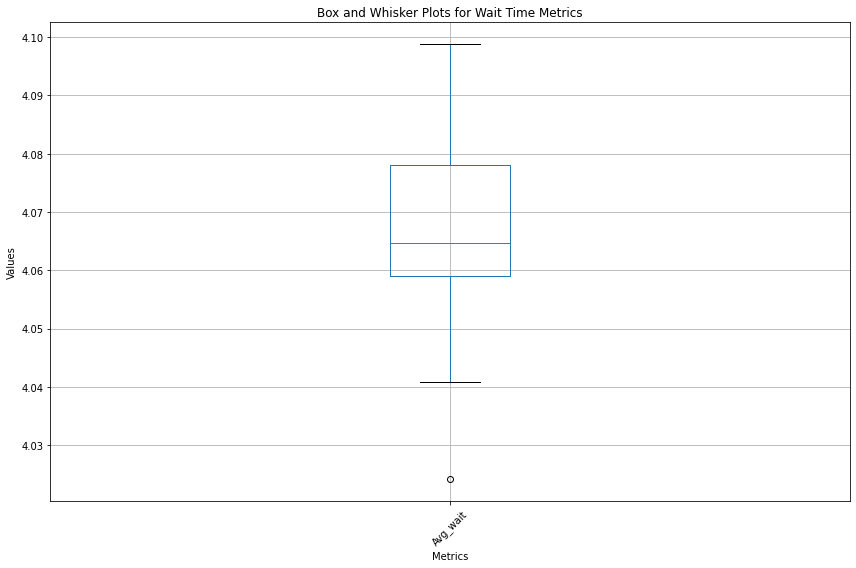

In [10]:
# Set the columns you want to include in the plot
columns_to_plot = ['Avg_wait']

# Create a box and whisker plot for each row
plt.figure(figsize=(12, 8))
wait_user[columns_to_plot].boxplot()

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Box and Whisker Plots for Wait Time Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis limits to include zero
#
# plt.ylim(bottom=0)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [11]:
#Calculate averages 

#Food 
avg=wait_food['Avg_wait'].mean()
avg_std= wait_food['Wait_stdv'].mean()
pct_served = served_food['Served_pct'].mean()
#q10= wait_food['Avg_wait'].quantile(0.1)
#q90= wait_food['Avg_wait'].quantile(0.9)

print('Food avg wait: ', avg)
print('Food wait stdev: ', avg_std)
print('Food served: ', pct_served)

#User
avg=wait_user['Avg_wait'].mean()
avg_std= wait_user['Wait_stdv'].mean()
pct_served = served_user['Served_pct'].mean()
print('User avg wait: ', avg)
print('User wait stdev: ', avg_std)
print('User served: ', pct_served)


Food avg wait:  5.14480986393949
Food wait stdev:  4.400709136529953
Food served:  100.0
User avg wait:  4.06750983048627
User wait stdev:  2.8759746035611697
User served:  100.0


In [12]:

# Create a list of your dataframes
dataframes = df_total_user # Replace with your actual dataframes

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'Time' column to datetime format
combined_df['Time'] = pd.to_datetime(combined_df['Time'])

# Extract day and hour from the 'Time' column
#combined_df['Day'] = combined_df['Time'].dt.day
combined_df['Hour'] = combined_df['Time'].dt.hour

# Function to calculate quantiles
def calculate_quantiles(series):
    return {
        'Q25': series.quantile(0.25),
        'Q50': series.median(),
        'Q75': series.quantile(0.75)
    }

# Calculate quantiles for each group of day and hour
grouped = combined_df.groupby(['Day', 'Hour'])['Wait Time (min)'].apply(calculate_quantiles).unstack()



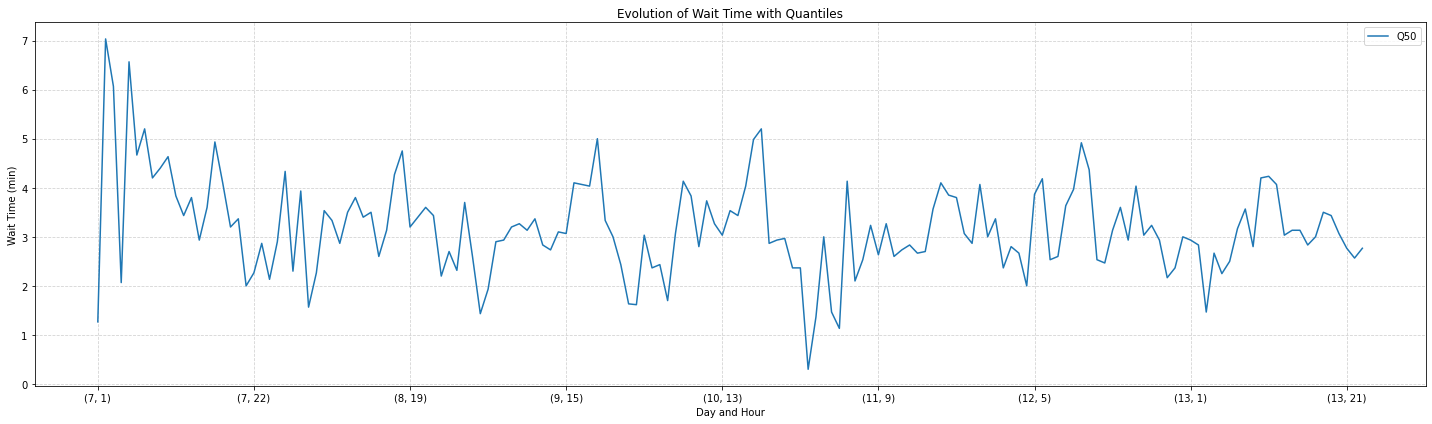

In [13]:
# Create a plot
plt.figure(figsize=(20, 6))

# Plot the quantiles
grouped['Q50'].plot(kind='line')

# Add labels and title
plt.xlabel('Day and Hour')
plt.ylabel('Wait Time (min)')
plt.title('Evolution of Wait Time with Quantiles')

# Add legend
plt.legend()

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [35]:
# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.Series(range(1, 8))
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_food_slt= pd.DataFrame(index=index).reset_index()
df_user_slt= pd.DataFrame(index=index).reset_index()

In [36]:
# Set the index 
df_food_slt['x_datetime'] = df_food_slt['day'].astype(str) + ', ' + df_food_slt['start_time_ed'].dt.strftime('%H:%M:%S')

In [37]:
# Set the index 
df_user_slt['x_datetime'] = df_user_slt['day'].astype(str) + ', ' + df_user_slt['start_time_ed'].dt.strftime('%H:%M:%S')

In [38]:
# Format the datetime columns
for sim_food in df_total_food:
    sim_food['Day'] = sim_food['Day'] - 6
    sim_food['start_time_ed'] = pd.to_datetime(sim_food['Time']).dt.floor('15Min')
    sim_food['Time_ed'] = sim_food['Day'].astype(str) + ', ' + sim_food['start_time_ed'].dt.strftime('%H:%M:%S')

for sim_user in df_total_user:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    sim_user['Time_ed'] = sim_user['Day'].astype(str) + ', ' + sim_user['start_time_ed'].dt.strftime('%H:%M:%S')

In [39]:
df_user_slt

,day,start_time_ed,x_datetime
0,1,2023-08-29 00:00:00,"1, 00:00:00"
1,1,2023-08-29 00:15:00,"1, 00:15:00"
2,1,2023-08-29 00:30:00,"1, 00:30:00"
3,1,2023-08-29 00:45:00,"1, 00:45:00"
4,1,2023-08-29 01:00:00,"1, 01:00:00"
...,...,...,...
667,7,2023-08-29 22:45:00,"7, 22:45:00"
668,7,2023-08-29 23:00:00,"7, 23:00:00"
669,7,2023-08-29 23:15:00,"7, 23:15:00"
670,7,2023-08-29 23:30:00,"7, 23:30:00"


In [29]:
df_food_full= pd.DataFrame(columns=['Time', 'AvgWait','Q25','Q75'])

for i,row in df_food_slt.iterrows():
    #get the time of the row 
    time = row['x_datetime']
    #Create an empty list
    list_times = []

    #Loop over sims, and save all the trips in that range
    for sim_df in df_total_food:
        
        tipsinRange = sim_df.loc[sim_df['Time_ed']==time]

        if not tipsinRange.empty:
            temp = tipsinRange.groupby('Time_ed')['Wait Time (min)'].mean()
            list_times.append(temp)

    if not list_times:
        # Handle the case where list_times is empty
        avgWait_temp = 0
        q25 = 0
        q75 = 0
    else:
        avgWait_temp = np.mean(list_times)
        q25 = np.percentile(list_times, 25)
        q75 = np.percentile(list_times, 75)

    df_food_full.loc[i] = [row['x_datetime']] + [avgWait_temp, q25,q75]
    
#df_food_full.fillna(0, inplace=True)

In [30]:

df_food_full


,Time,AvgWait,Q25,Q75
0,"1, 00:00:00",0,0,0
1,"1, 00:15:00",0,0,0
2,"1, 00:30:00",0,0,0
3,"1, 00:45:00",0,0,0
4,"1, 01:00:00",0,0,0
...,...,...,...,...
667,"7, 22:45:00",3.25928,2.97,3.53667
668,"7, 23:00:00",3.95397,3.54,4.3
669,"7, 23:15:00",1.78739,1.34167,2.24444
670,"7, 23:30:00",4.17778,4.2,4.2


In [48]:
df_user_full= pd.DataFrame(columns=['Time', 'AvgWait'])

for i,row in df_user_slt.iterrows():
    #get the time of the row 
    time = row['x_datetime']
    #Create an empty list
    list_times = []

    #Loop over sims, and save all the trips in that range
    for sim_df in df_total_user:
        
        tipsinRange = sim_df.loc[sim_df['Time_ed']==time]
        if not tipsinRange.empty:
            temp = tipsinRange.groupby('Time_ed')['Wait Time (min)'].mean()
            list_times.append(temp)

    avgWait_temp = np.mean(list_times)

    df_user_full.loc[i] = [row['x_datetime']] + [avgWait_temp]

df_user_full.fillna(0, inplace=True)

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


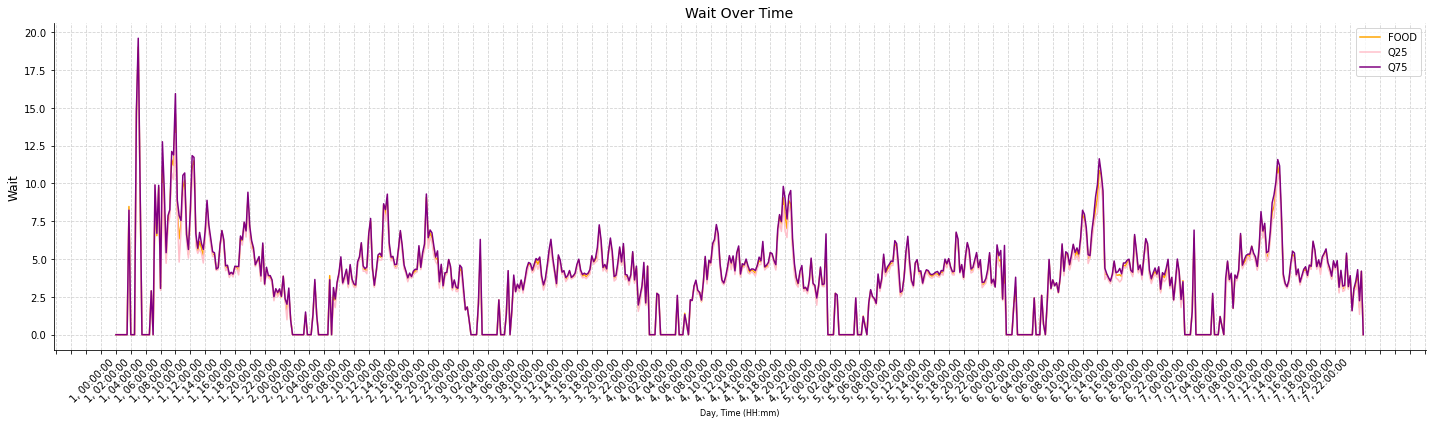

In [49]:

# Create a plot
plt.figure(figsize=(20, 6))

# Extract the last 8 digits of x_datetime for tick labels
#tick_labels = [label[-8:-3] for label in idle_count['Time'][::8]]

# Multiple line plots
plt.plot('Time', 'AvgWait', data=df_food_full, color='orange', label="FOOD")
plt.plot('Time', 'AvgWait', data=df_user_full, color='blue', label="USER")
#plt.plot('Time', 'Q25', data=df_food_full, color='pink', label="Q25")
#plt.plot('Time', 'Q75', data=df_food_full, color='purple', label="Q75")
#plt.fill_between(df_food_full['Time'], df_food_full['Q25'], df_food_full['Q75'], color='gray', alpha=0.3, label='25th-75th Percentile Range')

# Set the axis labels and title
plt.xlabel('Day, Time (HH:mm)', fontsize=8)
plt.ylabel('Wait', fontsize=12)
plt.title('Wait Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show legend
plt.legend(loc='best')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)


# Show every 20th tick
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=99))

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()